In [106]:
# Import dependencies
import plotly
import plotly.graph_objs as go
import sys
import os
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from collections import Counter
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
#import tables
import time
from scipy import stats
import glob
import pdb

In [85]:
names = pd.read_csv('/hdd/pbryant/results/mhc/20190912/autoenc/allele_names.txt', sep = '\n', header = None)
names = [*names[0]]
names

['HLA-DRB1*15:01',
 'HLA-DRB1*09:01',
 'HLA-DRB1*08:02',
 'DQB1*06:02',
 'HLA-DRB1*15:02',
 'HLA-DRB1*10:01',
 'HLA-DQA1*03:01',
 'HLA-DQA1*01:02',
 'DQB1*03:01',
 'HLA-DRB1*11:04',
 'HLA-DQA1*01:01',
 'HLA-DQA1*01:03',
 'HLA-DRB5*01:01',
 'HLA-DQA1*05:05',
 'DQB1*03:03',
 'HLA-DRB1*04:04',
 'HLA-DRB1*01:01',
 'DQB1*03:02',
 'HLA-DRB1*13:01',
 'HLA-DRB4*01:01',
 'HLA-DRB1*13:02',
 'HLA-DRB1*11:01',
 'HLA-DRB1*07:01',
 'HLA-DRB3*03:01',
 'HLA-DRB1*04:01',
 'HLA-DQA1*03:02',
 'HLA-DRB1*08:03',
 'HLA-DRB1*04:05',
 'HLA-DRB3*02:02',
 'HLA-DQA1*06:01',
 'HLA-DRB4*01:03',
 'DQB1*05:01',
 'DQB1*06:03',
 'DQB1*04:02',
 'DQB1*06:04',
 'HLA-DRB1*03:01',
 'HLA-DRB1*14:54',
 'HLA-DQA1*03:03',
 'HLA-DQA1*02:01',
 'HLA-DQA1*05:01',
 'HLA-DRB1*01:03',
 'HLA-DRB1*08:01',
 'HLA-DRB1*04:03',
 'HLA-DRB3*01:01']

In [88]:
nbs = []
for name in names:
    nb = name.split('*')
    nbs.append(nb[0])
names = nbs
names

['HLA-DRB1',
 'HLA-DRB1',
 'HLA-DRB1',
 'DQB1',
 'HLA-DRB1',
 'HLA-DRB1',
 'HLA-DQA1',
 'HLA-DQA1',
 'DQB1',
 'HLA-DRB1',
 'HLA-DQA1',
 'HLA-DQA1',
 'HLA-DRB5',
 'HLA-DQA1',
 'DQB1',
 'HLA-DRB1',
 'HLA-DRB1',
 'DQB1',
 'HLA-DRB1',
 'HLA-DRB4',
 'HLA-DRB1',
 'HLA-DRB1',
 'HLA-DRB1',
 'HLA-DRB3',
 'HLA-DRB1',
 'HLA-DQA1',
 'HLA-DRB1',
 'HLA-DRB1',
 'HLA-DRB3',
 'HLA-DQA1',
 'HLA-DRB4',
 'DQB1',
 'DQB1',
 'DQB1',
 'DQB1',
 'HLA-DRB1',
 'HLA-DRB1',
 'HLA-DQA1',
 'HLA-DQA1',
 'HLA-DQA1',
 'HLA-DRB1',
 'HLA-DRB1',
 'HLA-DRB1',
 'HLA-DRB3']

In [91]:
nbs = []
for name in names:
    nb = name.split('-')
    if len(nb)>1:
        nbs.append(nb[1])
    else:
        nbs.append(nb[0])
nbs

['DRB1',
 'DRB1',
 'DRB1',
 'DQB1',
 'DRB1',
 'DRB1',
 'DQA1',
 'DQA1',
 'DQB1',
 'DRB1',
 'DQA1',
 'DQA1',
 'DRB5',
 'DQA1',
 'DQB1',
 'DRB1',
 'DRB1',
 'DQB1',
 'DRB1',
 'DRB4',
 'DRB1',
 'DRB1',
 'DRB1',
 'DRB3',
 'DRB1',
 'DQA1',
 'DRB1',
 'DRB1',
 'DRB3',
 'DQA1',
 'DRB4',
 'DQB1',
 'DQB1',
 'DQB1',
 'DQB1',
 'DRB1',
 'DRB1',
 'DQA1',
 'DQA1',
 'DQA1',
 'DRB1',
 'DRB1',
 'DRB1',
 'DRB3']

In [92]:
Counter(nbs)

Counter({'DRB1': 20, 'DQB1': 8, 'DQA1': 10, 'DRB5': 1, 'DRB4': 2, 'DRB3': 3})

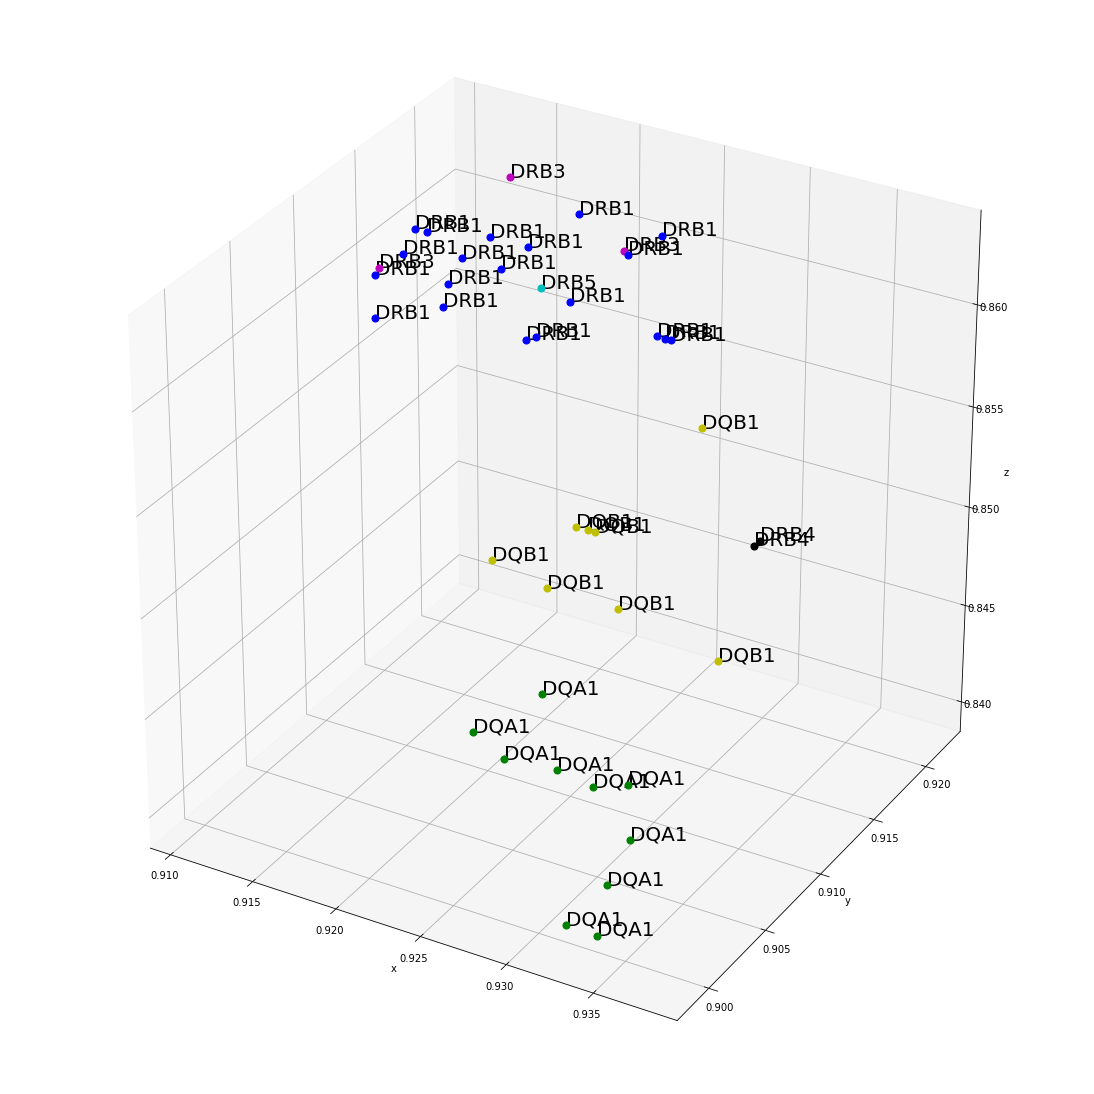

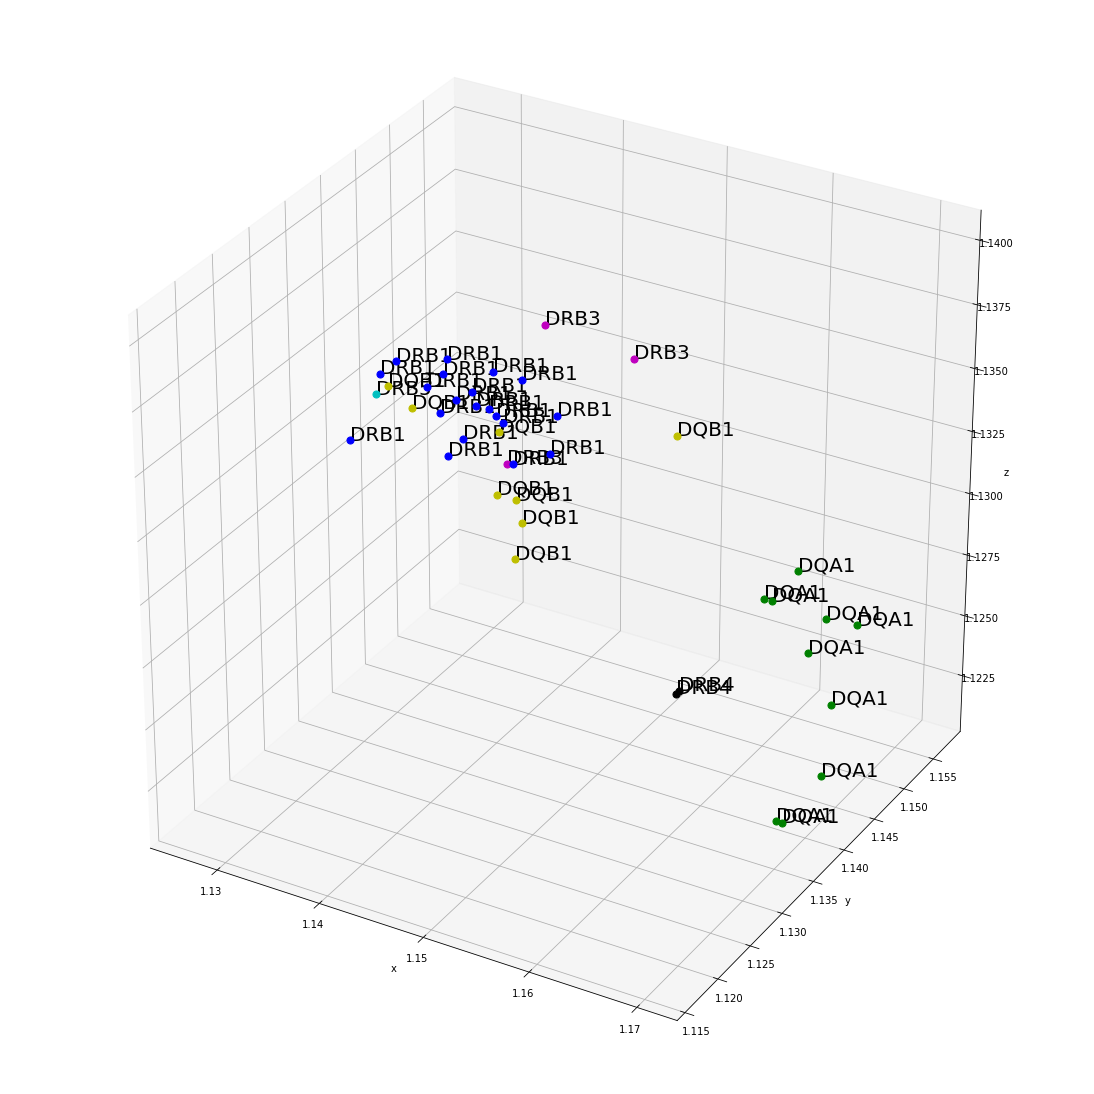

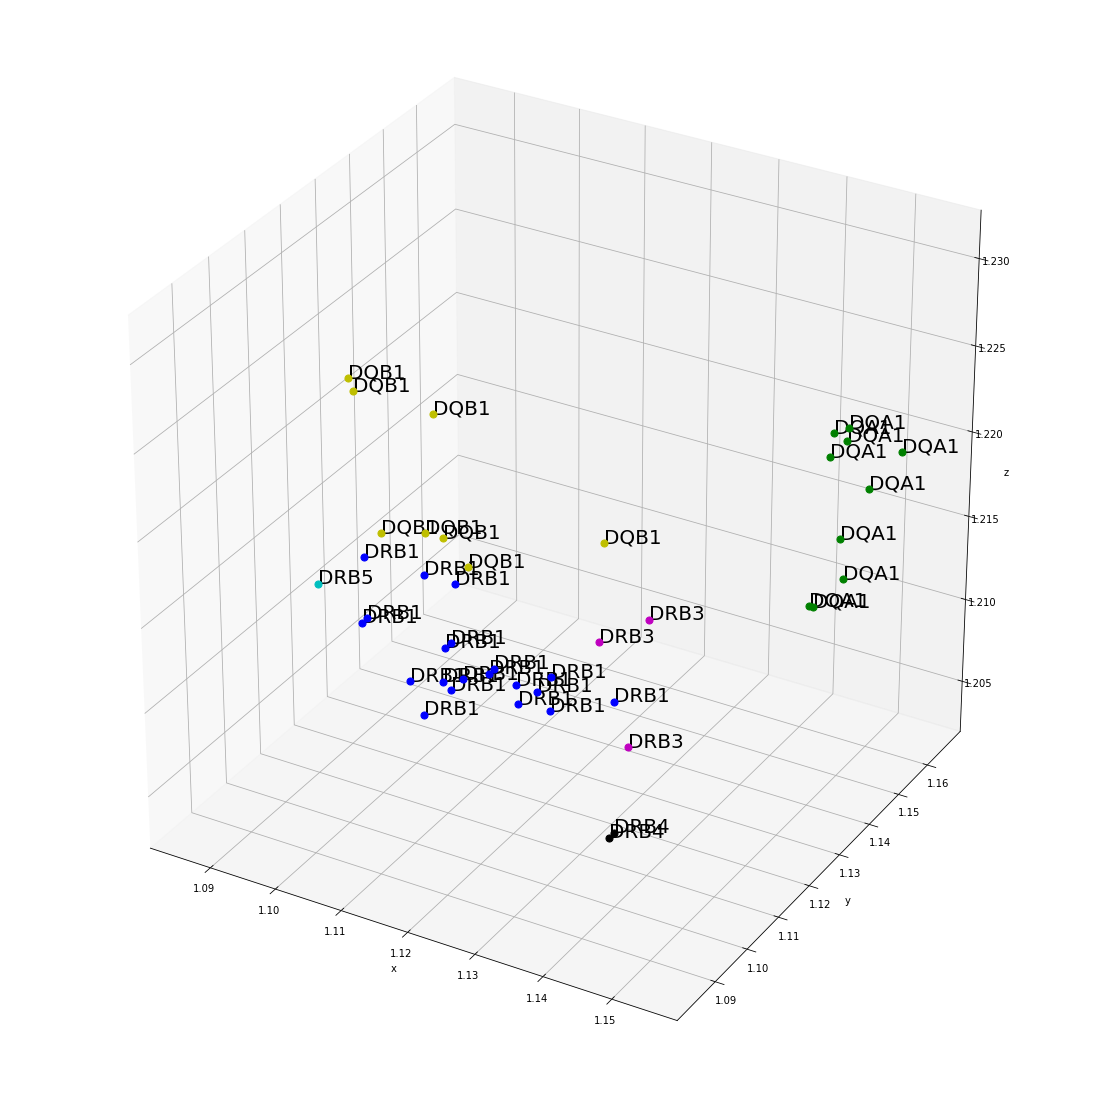

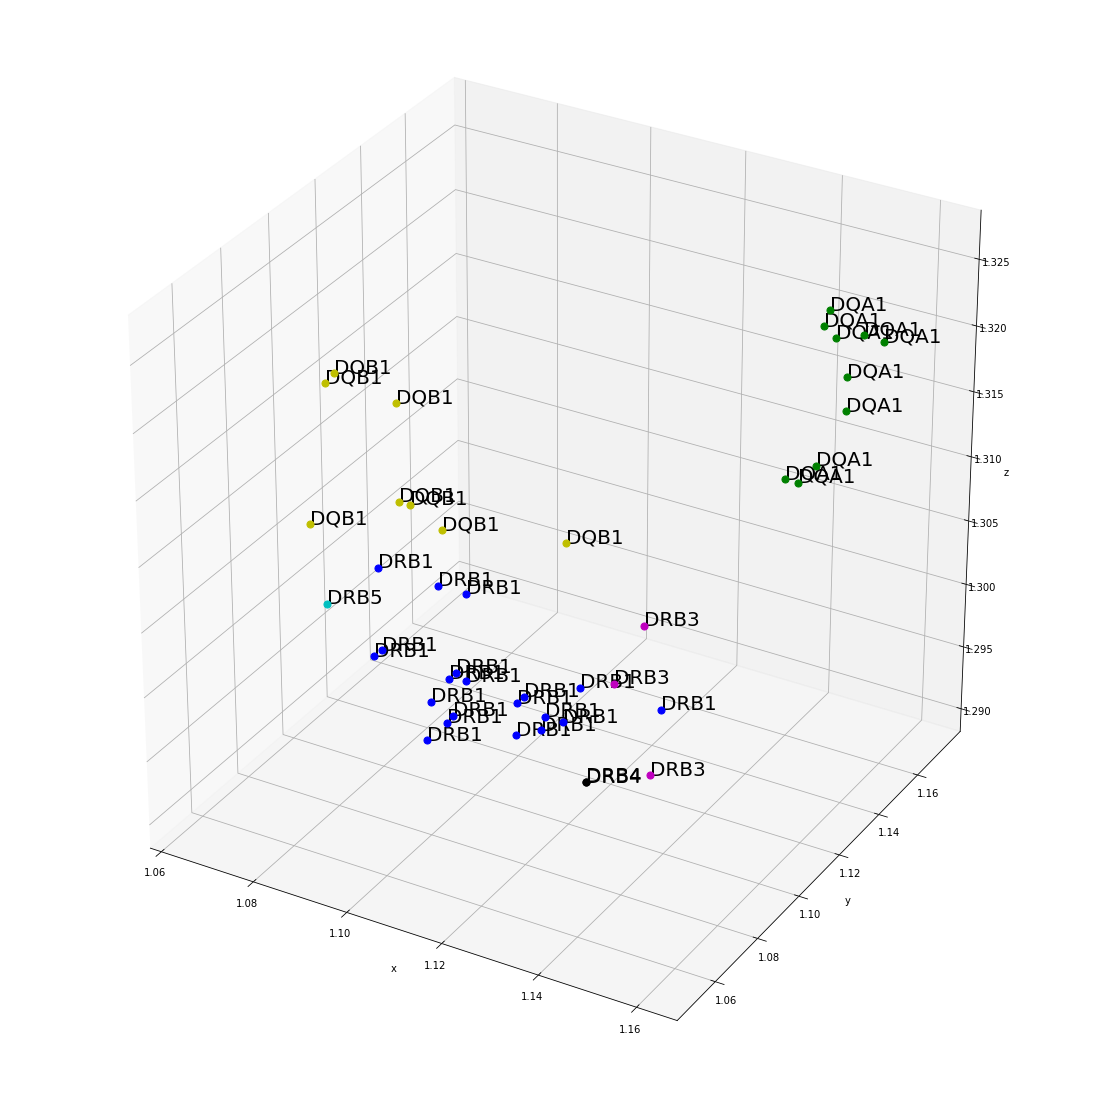

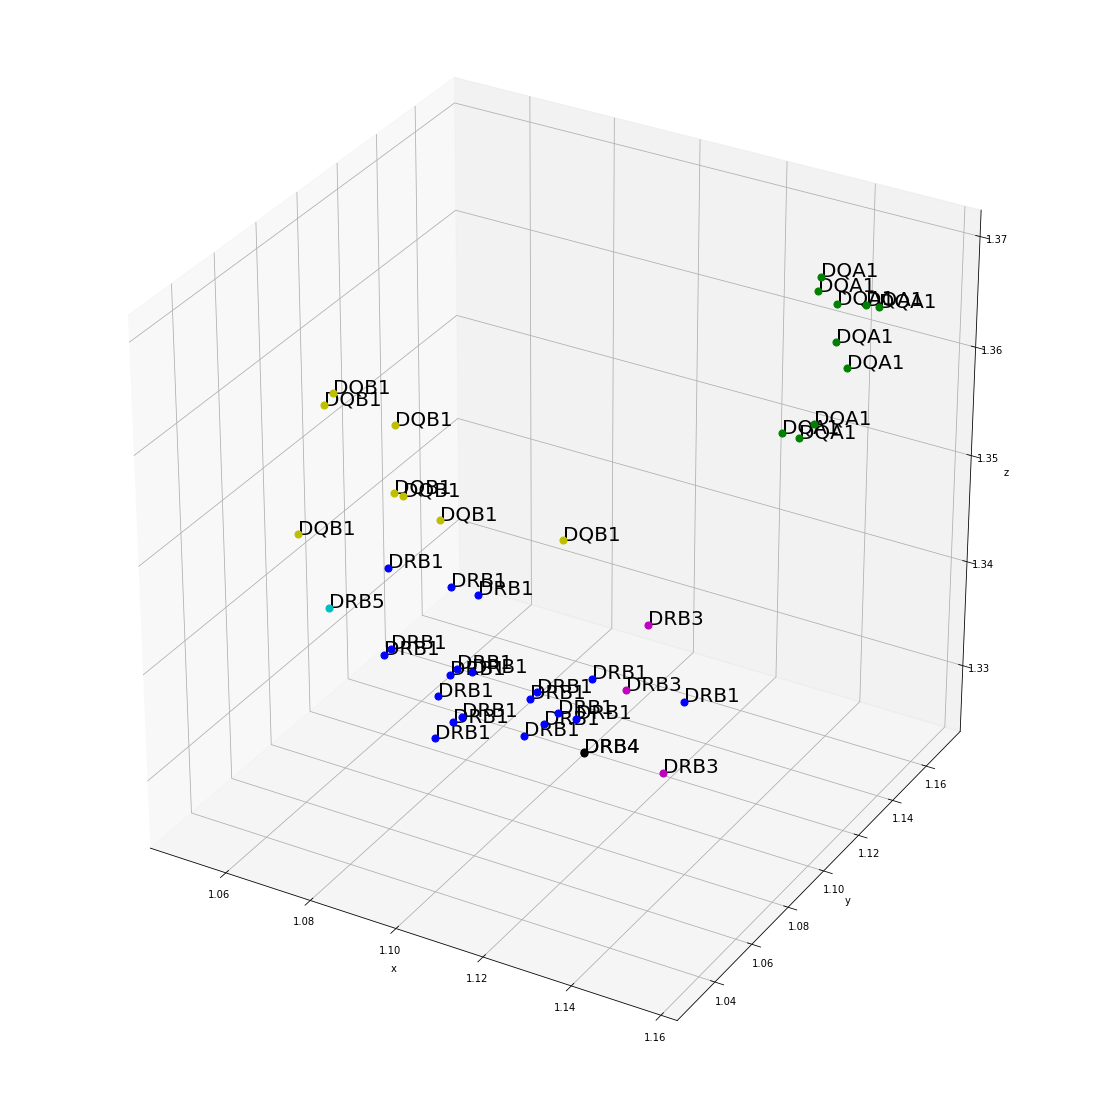

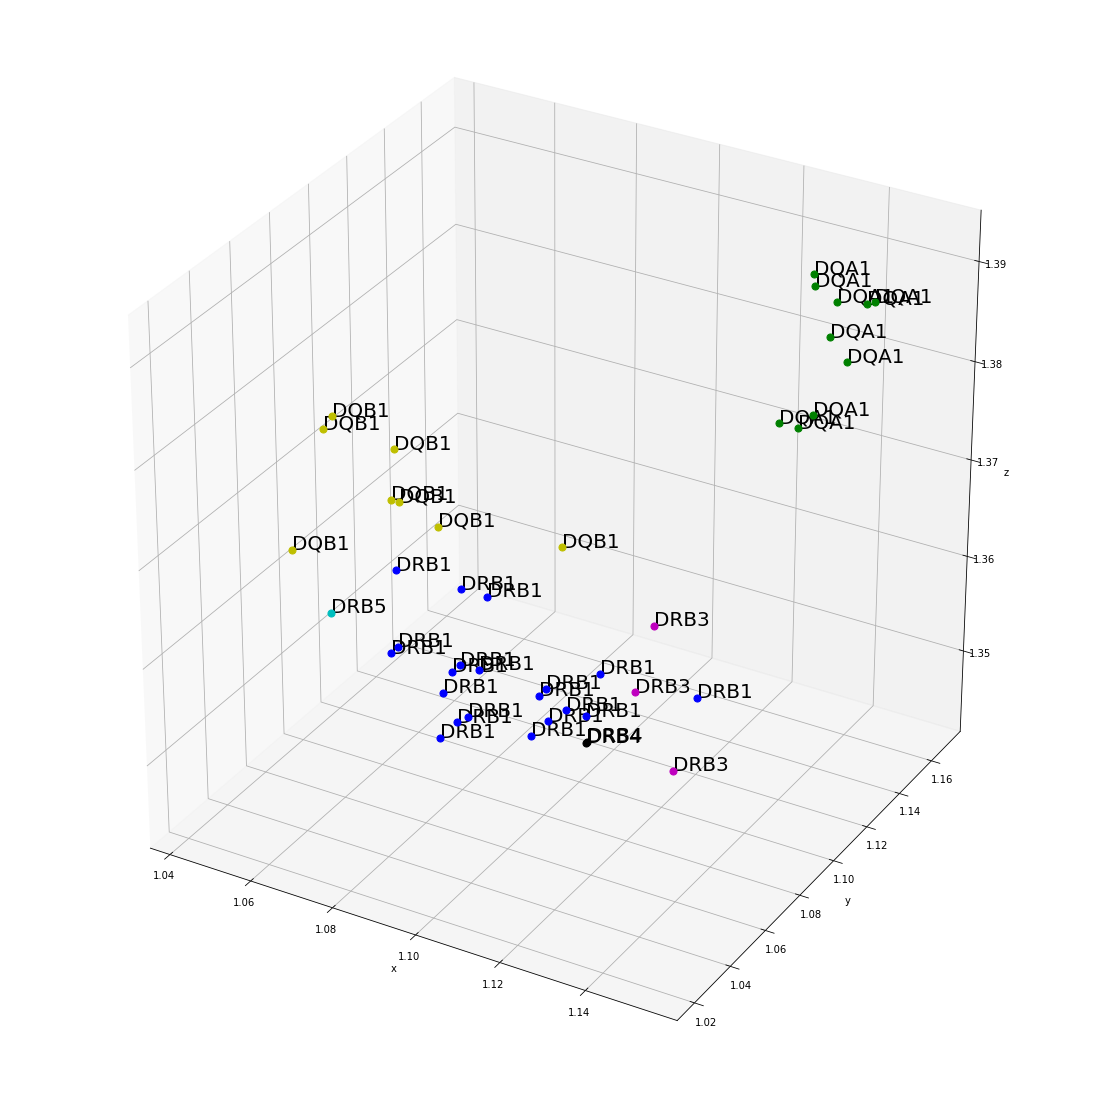

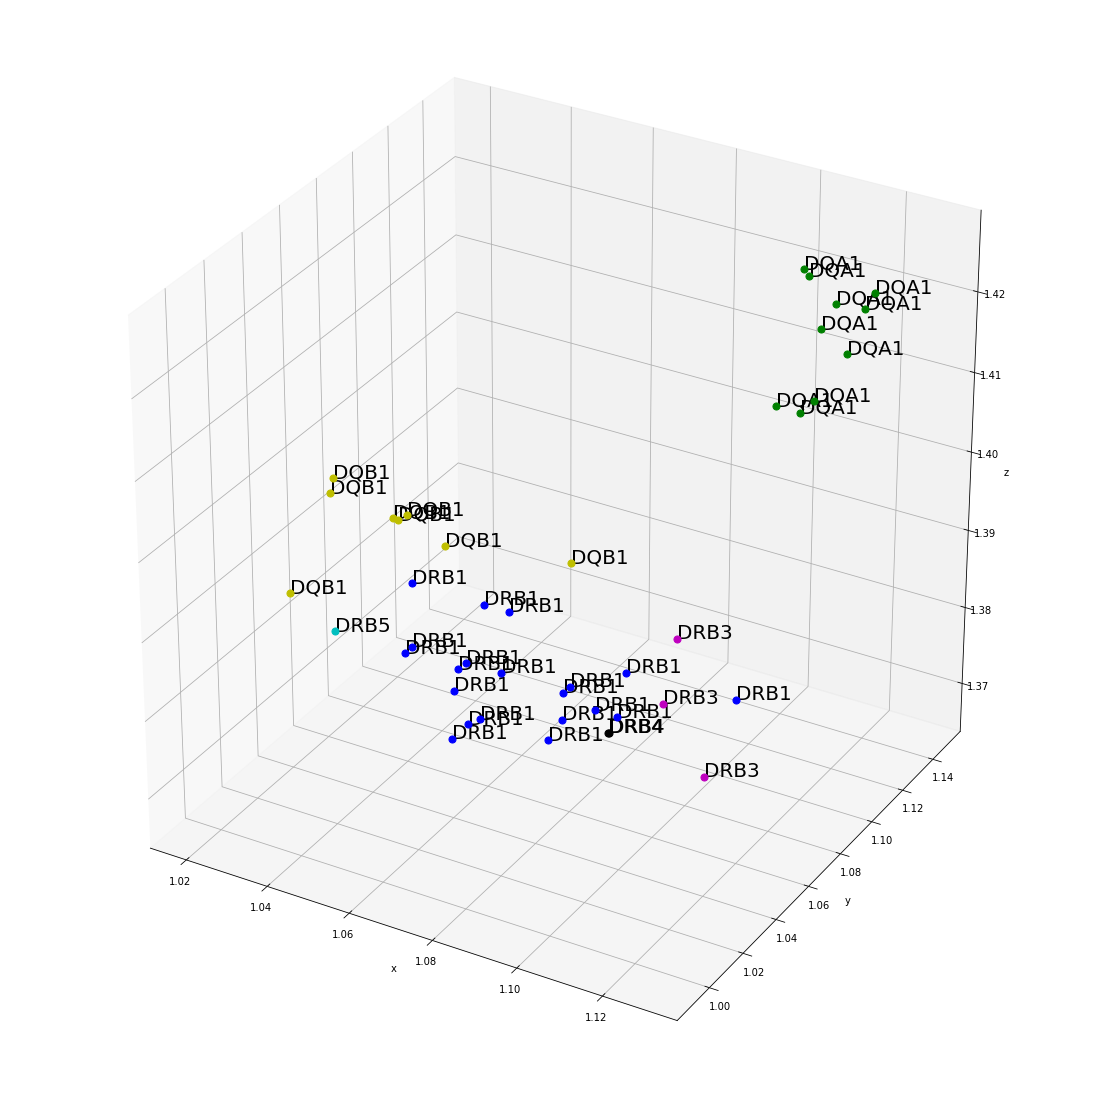

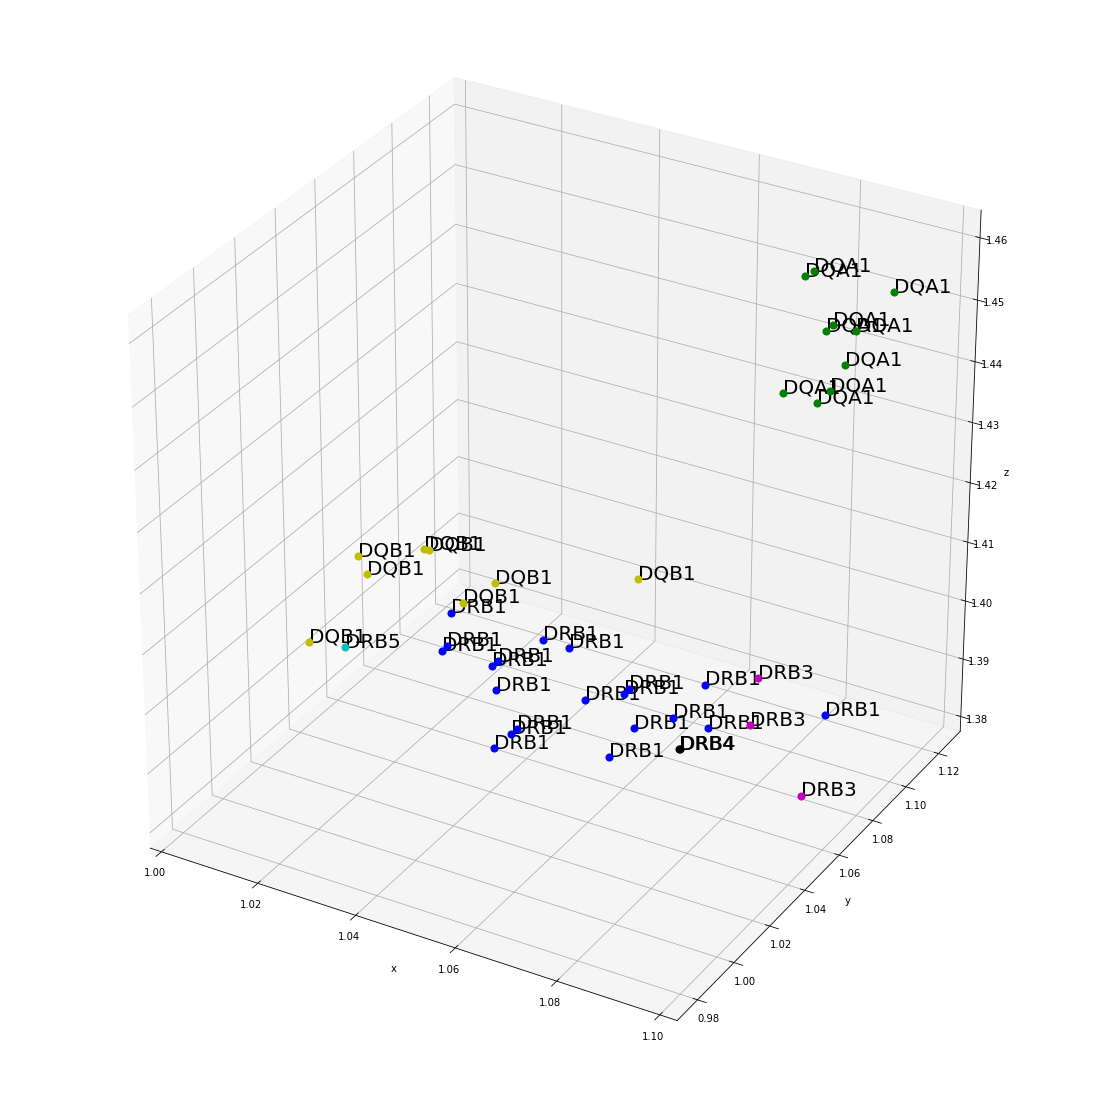

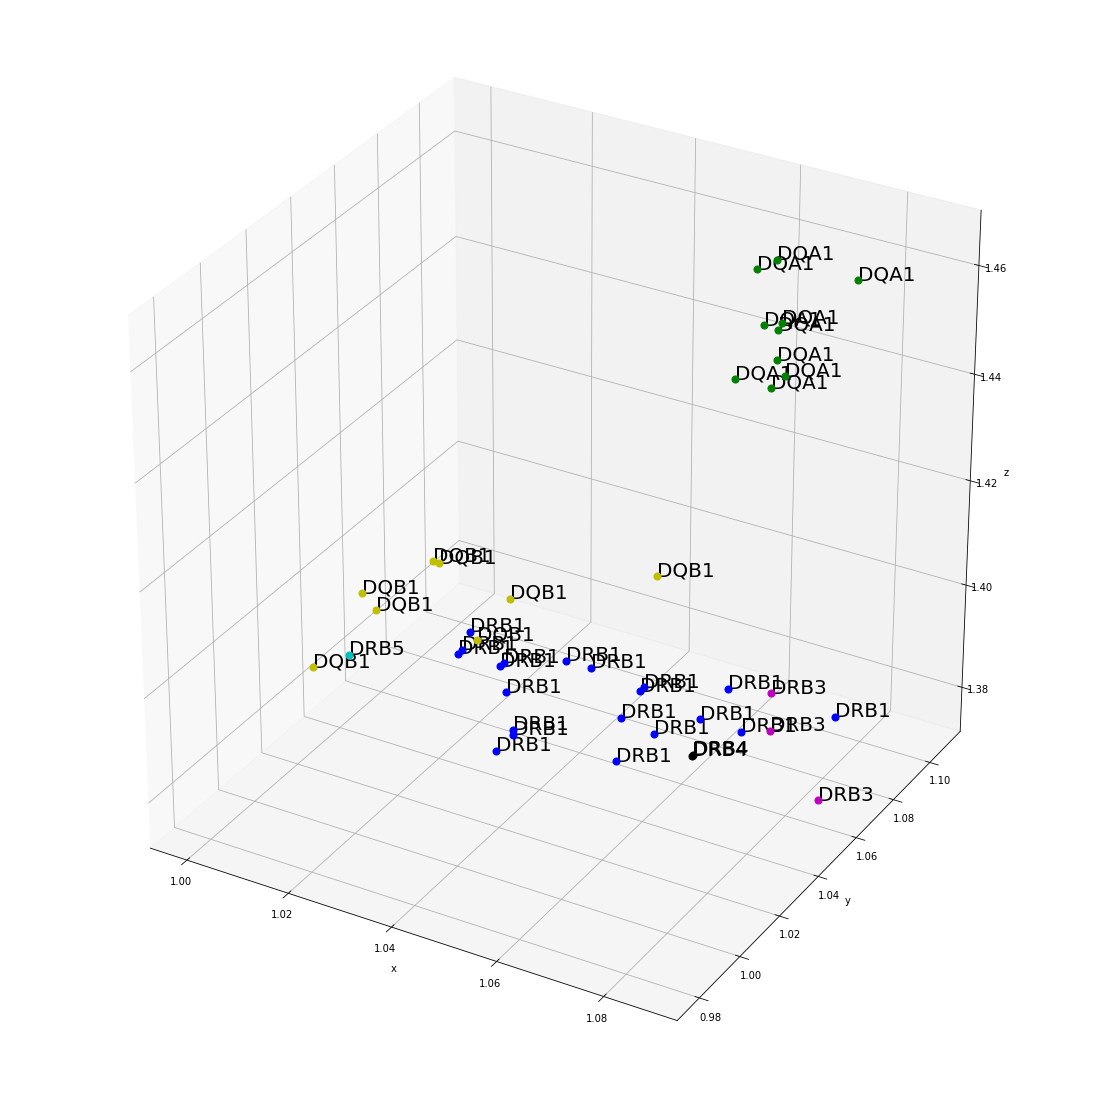

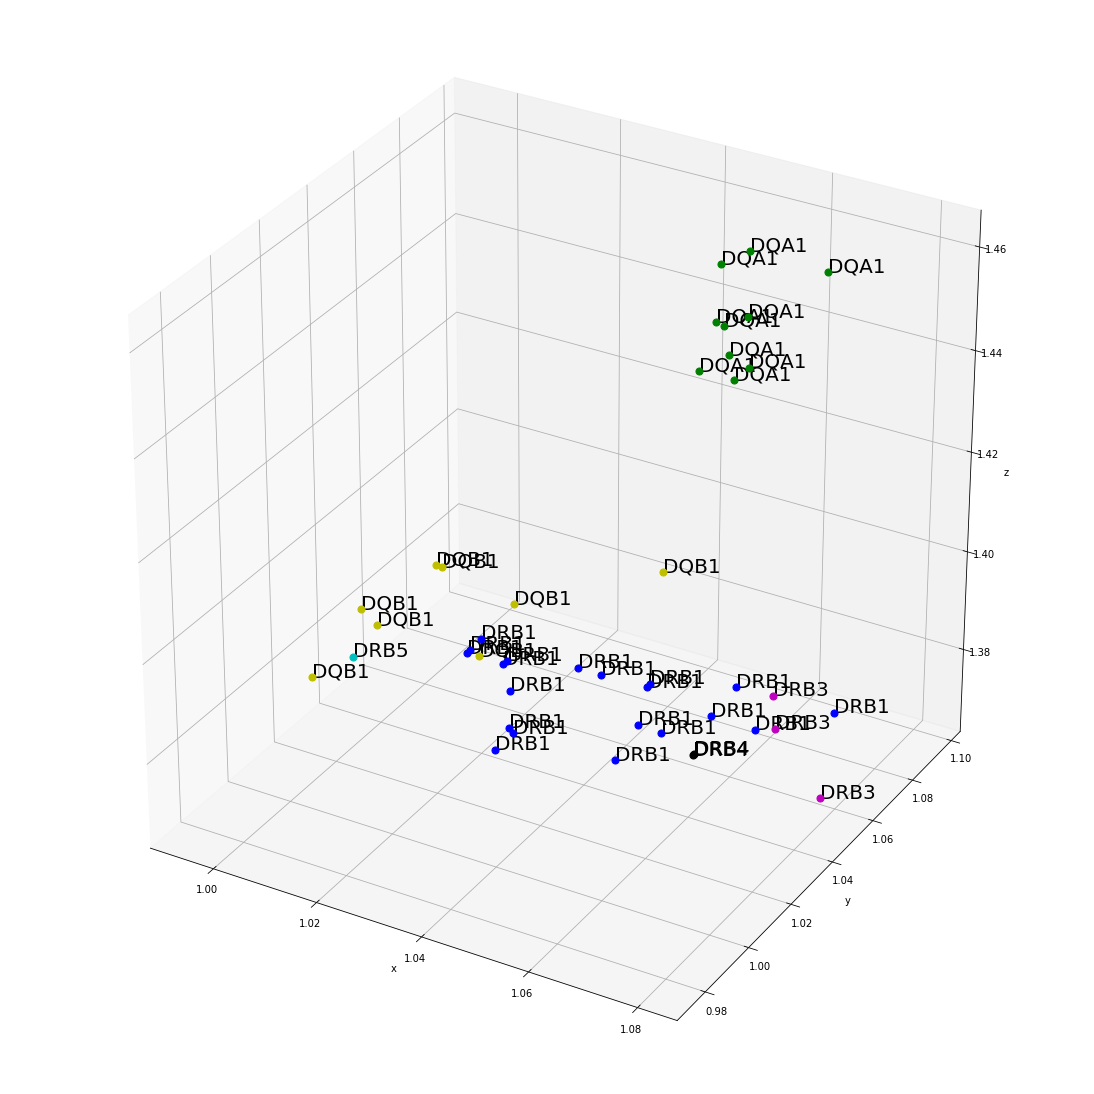

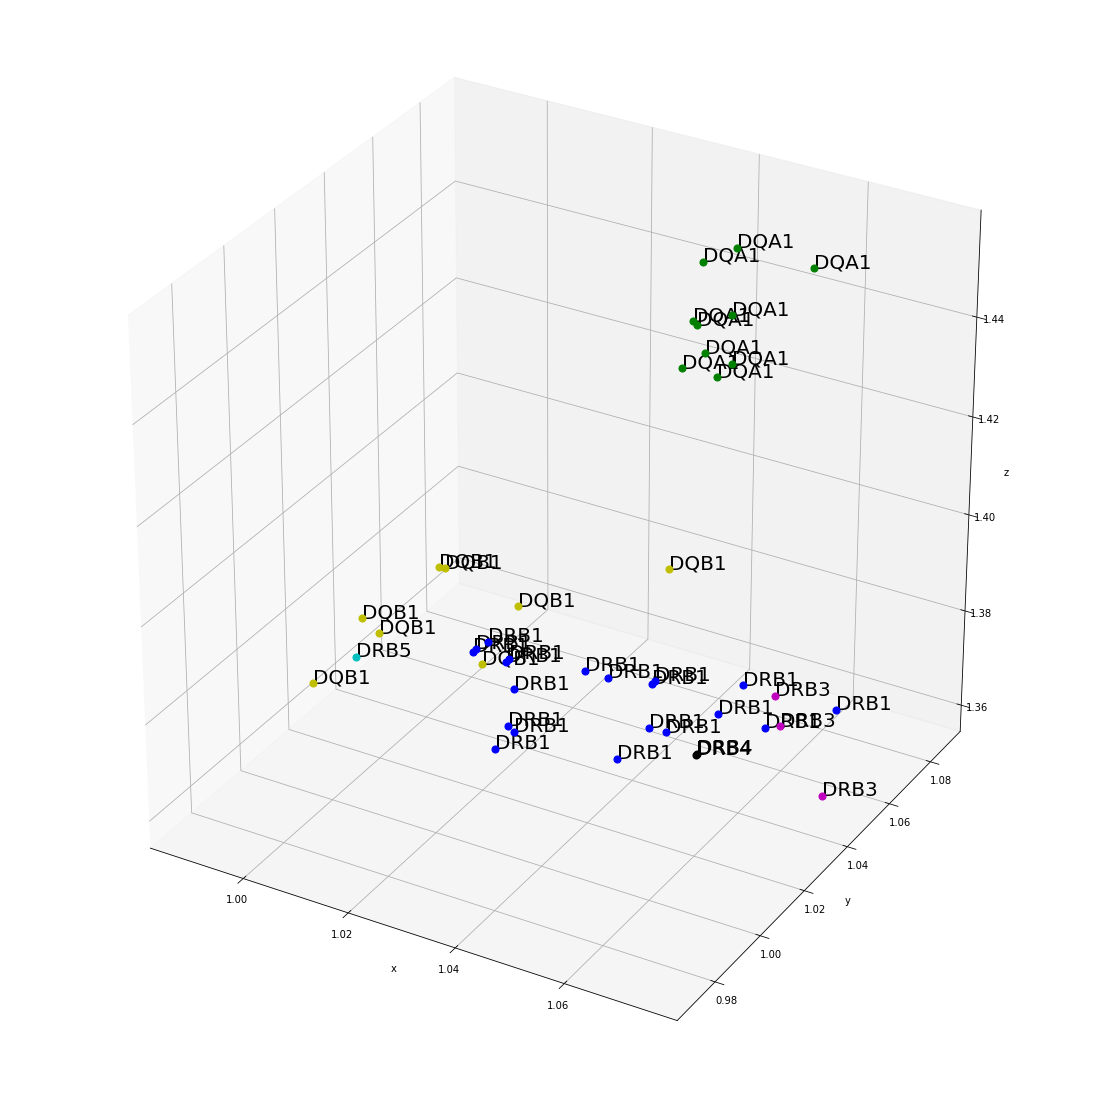

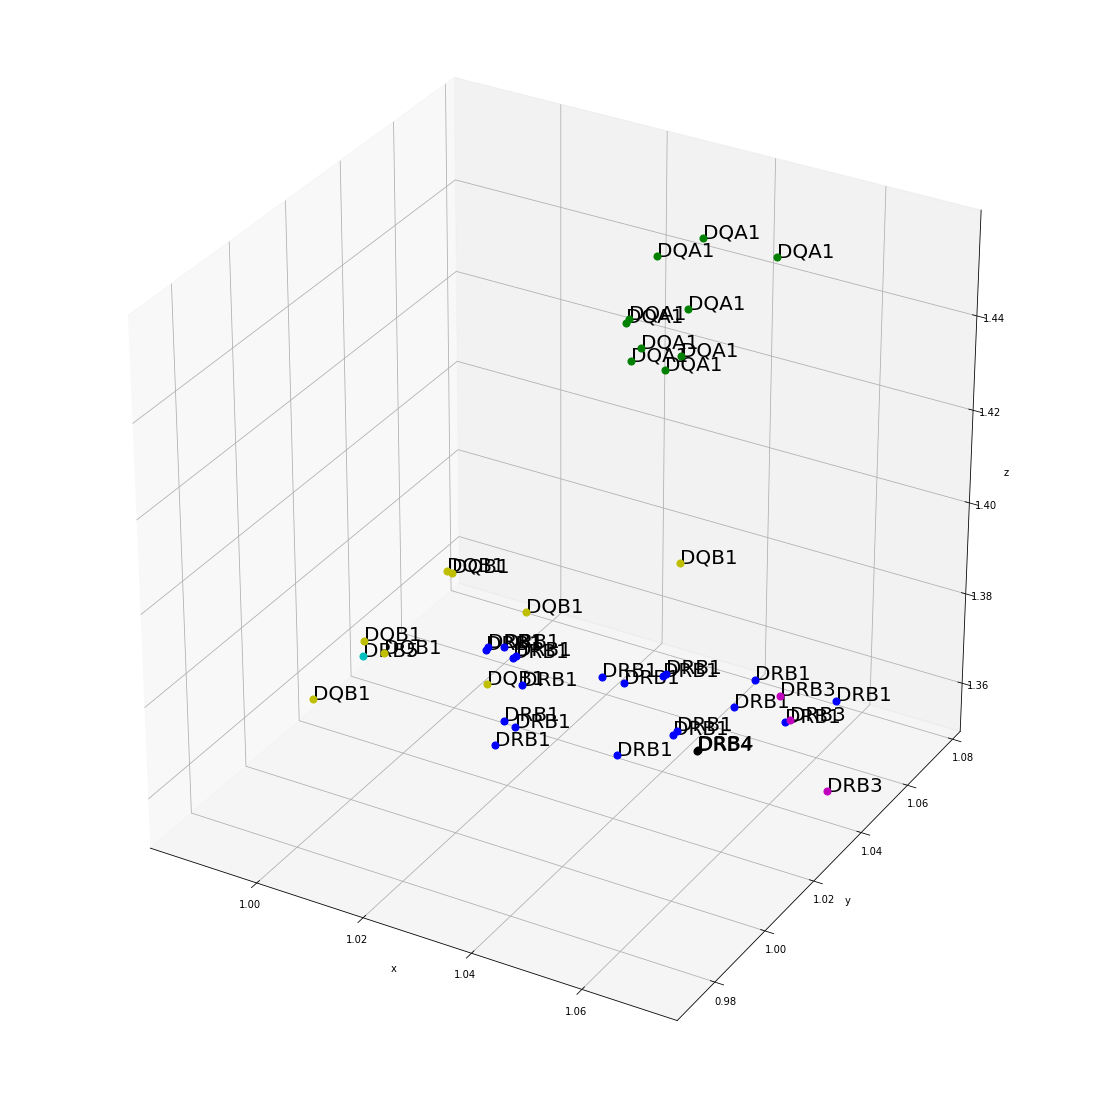

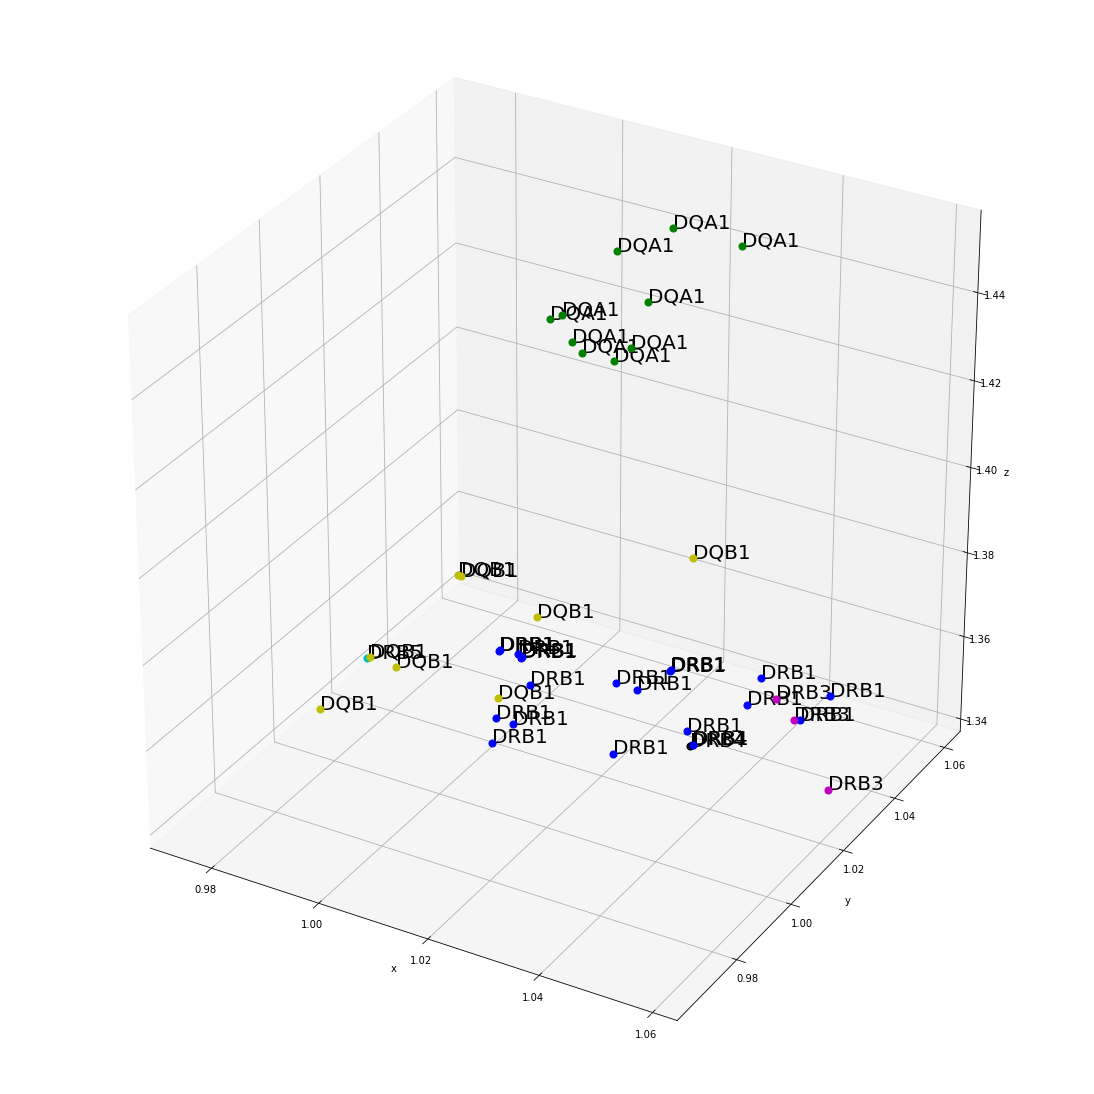

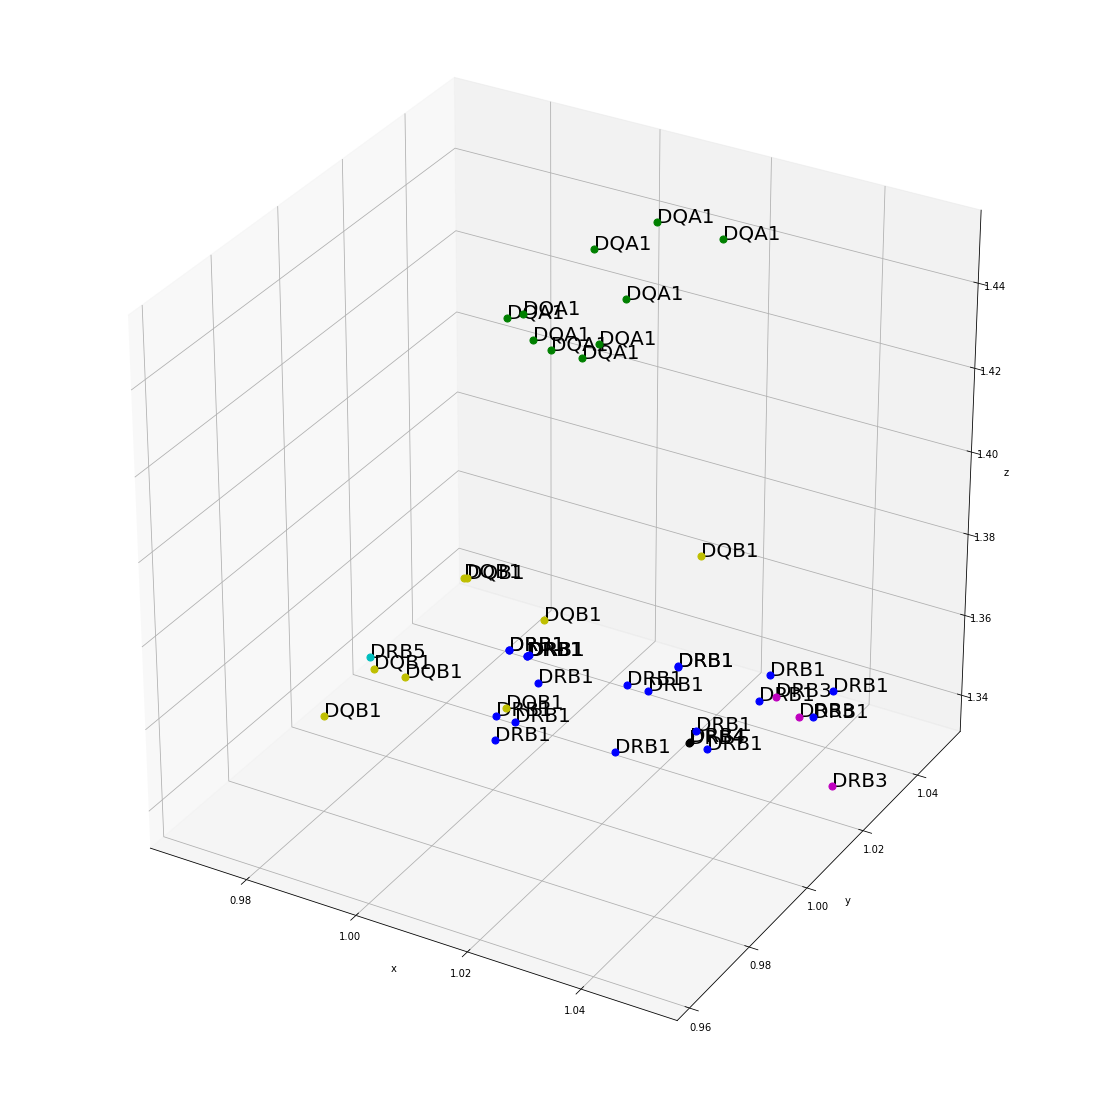

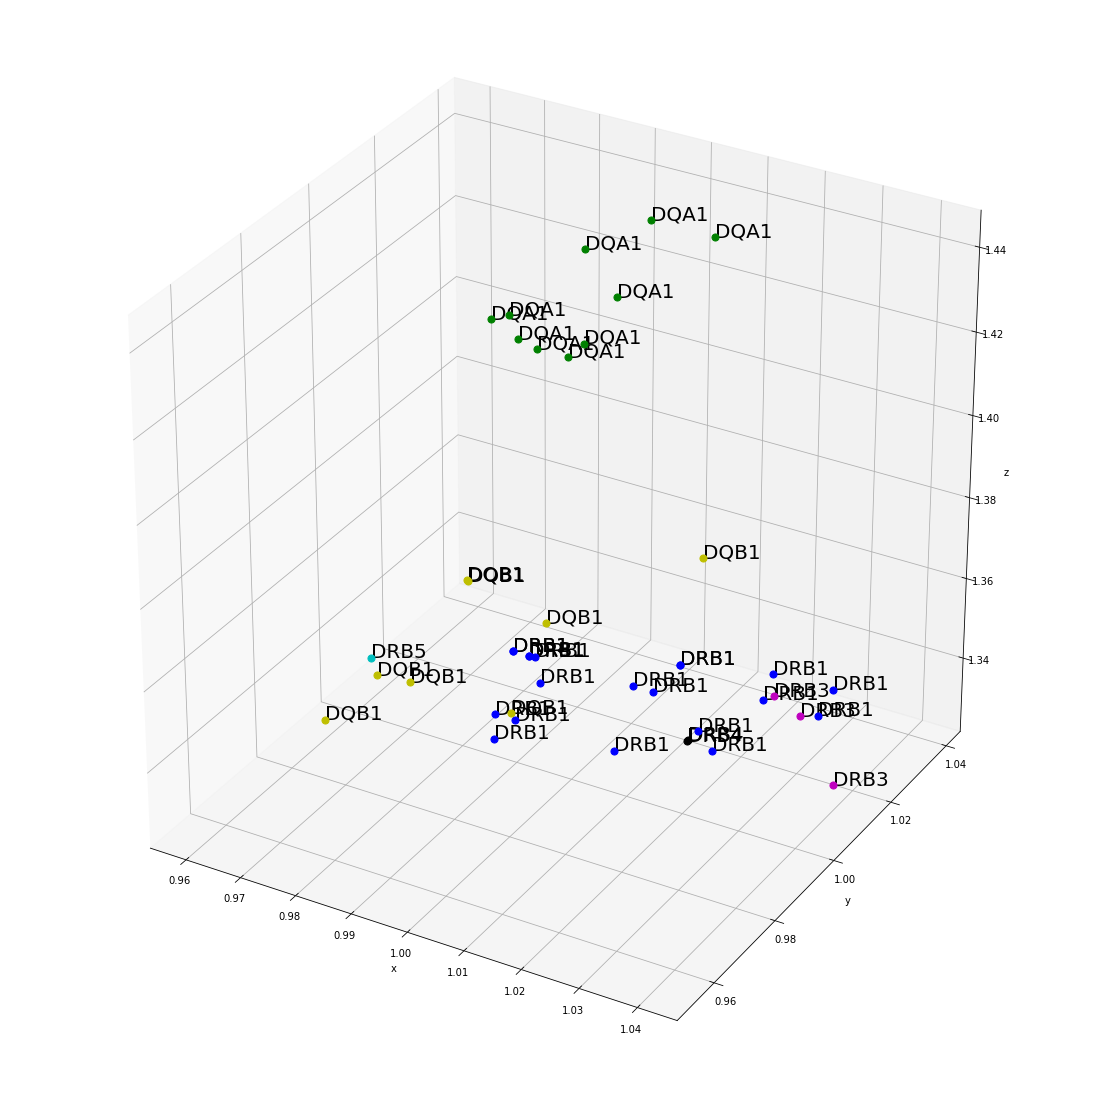

In [111]:
#Visualize class embeddings with t-sne
base = '/hdd/pbryant/results/mhc/20190912/autoenc/'
for i in range(1,31,2):
    embeddings = np.load(base+'emb_'+str(i)+'.npy', allow_pickle=True)
    #flat_emb = []
    #for emb in embeddings:
    #    flat_emb.append(emb.flatten())
    #flat_emb = np.array(flat_emb)
    #fashion_tsne = TSNE(random_state=0,n_components=3).fit_transform(flat_emb)
    x = np.concatenate(embeddings[:,0])
    y = np.concatenate(embeddings[:,1])
    z = np.concatenate(embeddings[:,2])
    plot3d(x,y,z, nbs)

In [93]:
Counter(nbs)

Counter({'DRB1': 20, 'DQB1': 8, 'DQA1': 10, 'DRB5': 1, 'DRB4': 2, 'DRB3': 3})

In [108]:
def plot3d(x,y,z,nbs):

    colors = {'DRB1': 'b', 'DQB1': 'y', 'DQA1': 'g', 'DRB5': 'c', 'DRB4': 'k', 'DRB3': 'm'}

    m=rand(3,3) # m is an array of (x,y,z) coordinate triplets

    fig = figure(figsize=(15, 15))
    ax = Axes3D(fig)


    for i in range(len(x)): #plot each point + it's index as text above
     ax.scatter(x[i],y[i],z[i],color=colors[nbs[i]], s = 50) 
     ax.text(x[i],y[i],z[i],  '%s' % (str(nbs[i])), size=20, zorder=1,  
     color='k') 

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')


In [22]:
np.concatenate(embeddings[:,0])

array([1.0087708 , 1.0261726 , 0.98961306, 0.99552774, 1.0087708 ,
       1.0296386 , 1.0105785 , 0.99998057, 0.9874745 , 0.986378  ,
       0.998188  , 0.996878  , 0.9651054 , 0.9999021 , 1.0008864 ,
       0.9962749 , 1.0349813 , 1.0187354 , 0.9897167 , 1.0249029 ,
       0.9897167 , 0.986378  , 1.0376949 , 1.0478735 , 0.9927538 ,
       1.0049206 , 1.0115268 , 1.0145782 , 1.0310471 , 1.0083718 ,
       1.0249029 , 1.0236835 , 0.9958864 , 0.9955633 , 1.0124776 ,
       0.99559975, 1.0244118 , 1.0105785 , 1.0024378 , 1.0120633 ,
       1.0247666 , 1.0079163 , 0.9962749 , 1.0350375 ], dtype=float32)

In [80]:
def plot_emb(x,y,z, alleles):
# Configure Plotly to be rendered inline in the notebook.
    plotly.offline.init_notebook_mode()

    # Configure the trace.
    trace = go.Scatter3d(
        x=x,  # <-- Put your data instead
        y=y,  # <-- Put your data instead
        z=z,  # <-- Put your data instead
        mode='markers',
        marker={'color': np.arange(43),
            'size': 2,
            'opacity': 0.8,
        }
    )

    # Configure the layout.
    layout = go.Layout(
        margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
    )

    data = [trace]

    plot_figure = go.Figure(data=data, layout=layout)

    # Render the plot.
    plotly.offline.iplot(plot_figure)
